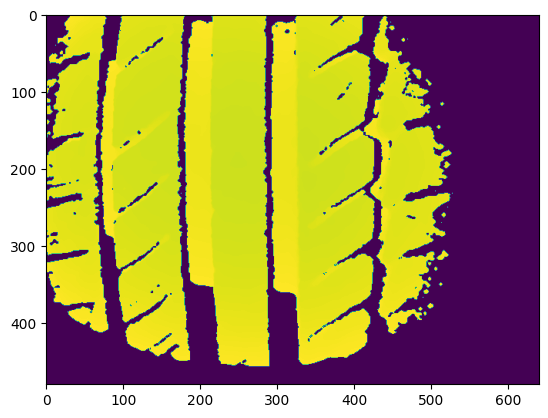

(480, 640)


In [61]:
import numpy as np
import matplotlib.pyplot as plt

pointcloud1 = np.load("data\depth_image.npy")
pointcloud2 = np.load("data\depth_image.npy (1).npy")

plt.imshow(pointcloud1)
plt.show()

print(pointcloud1.shape)

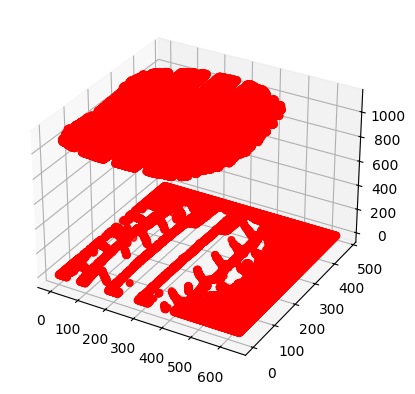

In [94]:
# 3d plot of the point clouds plointcloud1 and pointcloud2 (480, 640) as points in 3d space with scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(0, 640, 1)
y = np.arange(0, 480, 1)
X, Y = np.meshgrid(x, y)
Z = pointcloud1

ax.scatter(X, Y, Z, c='r')


plt.show()


In [71]:
from simpleicp import PointCloud, SimpleICP

# Transform point clouds (480, 640) into n-by-3 numpy arrays
pc1 = np.array([[x, y, pointcloud1[x, y]] for x in range(pointcloud1.shape[0]) for y in range(pointcloud1.shape[1]) if pointcloud1[x, y] != 0])
pc2 = np.array([[x, y, pointcloud2[x, y]] for x in range(pointcloud2.shape[0]) for y in range(pointcloud2.shape[1]) if pointcloud2[x, y] != 0])



p1 = PointCloud(pc1, columns=['x', 'y', 'z'])
p2 = PointCloud(pc2, columns=['x', 'y', 'z'])

icp = SimpleICP()
icp.add_point_clouds(p1, p2)
H, X_mov_transformed, rigid_body_transformation_params, distance_residuals = icp.run()
print(X_mov_transformed)



Select points for correspondences in fixed point cloud ...
Estimate normals of selected points ...
Start iterations ...
iteration | correspondences | mean(residuals) |  std(residuals)
   orig:0 |             540 |         -0.0004 |          0.1175
        1 |             539 |         -0.0074 |          0.1136
        2 |             550 |         -0.0031 |          0.1223
        3 |             552 |         -0.0046 |          0.1205
        4 |             547 |         -0.0051 |          0.1131
        5 |             548 |         -0.0068 |          0.1116
        6 |             543 |         -0.0076 |          0.1070
        7 |             540 |         -0.0060 |          0.1028
        8 |             534 |         -0.0067 |          0.0887
        9 |             532 |         -0.0075 |          0.0796
       10 |             528 |         -0.0067 |          0.0752
       11 |             529 |         -0.0073 |          0.0769
       12 |             531 |         -0.0071 | 

In [ ]:
from scipy.signal import find_peaks

def reconstruct_sclice(middle):
    for i, value in enumerate(middle):
        if value == 0:
            if i == 0:
                middle[i] = middle[i+1]
            elif i == 639:
                middle[i] = middle[i-1]
            else:
                middle[i] = (middle[i-1] + middle[i+1]) / 2
    return middle


#plot different slices of the pointcloud
for i in range(0, 479, 20):
    middle = pointcloud1[i]
    max_peaks, _ = find_peaks(middle, height=0)
    min_peaks, _ = find_peaks(-middle, height=0)


    plt.plot(middle)
    plt.show()
    # plt.plot(max_peaks, middle[max_peaks], "x")
    # plt.plot(min_peaks, middle[min_peaks], "x")

    # for i in range(len(max_peaks)):
    #     plt.text(max_peaks[i], middle[max_peaks[i]], str(middle[max_peaks[i]]))
    # for i in range(len(min_peaks)):
    #     plt.text(min_peaks[i], middle[min_peaks[i]], str(middle[min_peaks[i]]))


plt.show()

[51, 36, 52, 53, 46, 33, 1, 10, 15]


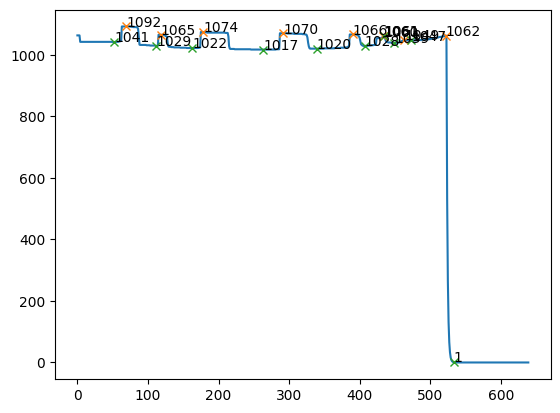

In [28]:
from scipy.signal import find_peaks




    
# get the difference between the max and min peaks
diff = []
for i in range(len(max_peaks)):
    diff.append(middle[max_peaks[i]] - middle[min_peaks[i]])
print(diff)
    
plt.show()

[1, 13, 20, 25, 22, 14, 65524, 65518, 3, 65531, 4, 16, 23, 28, 25, 17, 65527, 65521, 6, 65534, 51, 63, 70, 75, 72, 64, 38, 32, 53, 45, 24, 36, 43, 48, 45, 37, 11, 5, 26, 18, 65519, 65531, 2, 7, 4, 65532, 65506, 65500, 65521, 65513, 33, 45, 52, 57, 54, 46, 20, 14, 35, 27, 65513, 65525, 65532, 1, 65534, 65526, 65500, 65494, 65515, 65507, 29, 41, 48, 53, 50, 42, 16, 10, 31, 23, 65524, 0, 7, 12, 9, 1, 65511, 65505, 65526, 65518, 25, 37, 44, 49, 46, 38, 12, 6, 27, 19, 65528, 4, 11, 16, 13, 5, 65515, 65509, 65530, 65522, 20, 32, 39, 44, 41, 33, 7, 1, 22, 14, 20, 32, 39, 44, 41, 33, 7, 1, 22, 14, 8, 20, 27, 32, 29, 21, 65531, 65525, 10, 2, 21, 33, 40, 45, 42, 34, 8, 2, 23, 15]


C:\Users\manu\AppData\Local\Temp\ipykernel_17264\149038146.py:20: RuntimeWarning: overflow encountered in scalar subtract
  diffs.append(abs(pointcloud1[240][maxs[0][i]] - pointcloud1[240][mins[0][j]]))


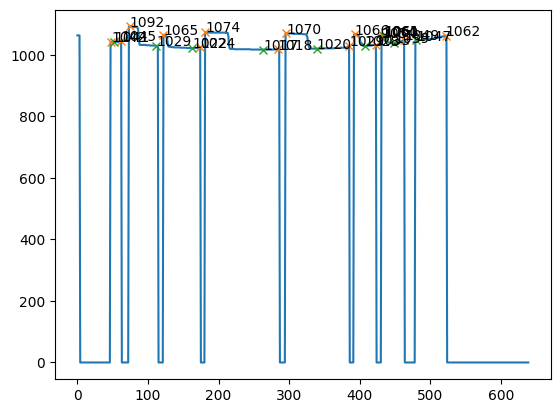

In [8]:
# get the max and min relatives of the pointcloud (480x640)
from scipy.signal import find_peaks

maxs = find_peaks(pointcloud1[240], height=0)
mins = find_peaks(-pointcloud1[240], height=0)

# plot the maxs and mins inside the pointcloud with the values as text
plt.plot(pointcloud1[240])
plt.plot(maxs[0], pointcloud1[240][maxs[0]], "x")
plt.plot(mins[0], pointcloud1[240][mins[0]], "x")
for i in range(len(maxs[0])):
    plt.text(maxs[0][i], pointcloud1[240][maxs[0][i]], str(pointcloud1[240][maxs[0][i]]))
for i in range(len(mins[0])):
    plt.text(mins[0][i], pointcloud1[240][mins[0][i]], str(pointcloud1[240][mins[0][i]]))
    
#print differences between maxs and mins
diffs = []
for i in range(len(maxs[0])):
    for j in range(len(mins[0])):
        diffs.append(abs(pointcloud1[240][maxs[0][i]] - pointcloud1[240][mins[0][j]]))
print(diffs)


plt.show()
